In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [2]:
Age_data = pd.read_csv('age.csv', encoding='cp949')
Gender_data = pd.read_csv('gender.csv', encoding='cp949')
DailyMenulog_data = pd.read_csv('DailyMenulog.csv', encoding='cp949')
# PatInfo_data = pd.read_csv('PatInfo.csv')


Menulog_newID_data = pd.read_csv('Menulog_newID.csv', encoding='cp949')
MonthlyTotalUsage_data = pd.read_csv('MonthlyTotalUsage.csv', encoding='cp949')
MonthUsage_Earlyadopt_2years_data = pd.read_csv('MonthUsage_Earlyadopt_2years.csv', encoding='cp949')

PT_Dx_data = pd.read_csv('PT_Dx.csv', encoding='cp949')
PT_visit_data = pd.read_csv('PT_visit.csv', encoding='cp949')

# UserIDs_data = pd.read_csv('UserIDs.csv', encoding='cp949')
# Userlog_newID_data = pd.read_csv('Userlog_newID.csv', encoding='cp949')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
PT_Dx_data

,PT_ID,age_at_Dx,date_of_Dx,KCD_code,Dx_dept
0,1197419933,40,201001,C50,ONC
1,1196364709,44,201004,K86,GI
2,1196364685,0,201004,E71,PEM
3,1196364685,0,201004,D70,PEM
4,1196364685,0,201004,E72,PEM
...,...,...,...,...,...
2875718,1166762334,58,Z244,INF,20180704
2875719,1166754099,65,J984,PLM,20180823
2875720,1166754099,65,B181A,GI,20180821
2875721,1166751153,38,M255,OS,20180517


# Age, Gender, DailyMenulog_data 합침.

In [4]:
# Age와 Gender 합침.
new_data = pd.merge(Age_data, Gender_data, on='연구번호')
new_data

,연구번호,연령 10단위,성별코드
0,1179600828,40,F
1,1175538182,60,M
2,1200092624,40,F
3,1189841991,20,F
4,1207383951,60,M
...,...,...,...
59670,1197727240,30,F
59671,1193847857,30,F
59672,1180628025,40,F
59673,1198050958,30,F


In [5]:
DailyMenulog_data.columns = ['연구번호', 'logdate', 'service', 'Count']
DailyMenulog_data

,연구번호,logdate,service,Count
0,10000000001,2017-01-09,M1200,1
1,10000000005,2015-12-31,M1131,15
2,10000000005,2015-12-31,M1132,15
3,10000000005,2016-02-08,M1101,2
4,10000000005,2016-02-08,M1102,2
...,...,...,...,...
5933577,1211101060,2018-06-05,M1312,2
5933578,1211101060,2018-06-05,M1401,1
5933579,1211101060,2018-06-07,M1401,2
5933580,1211101060,2018-06-07,M1409,1


In [6]:
# 현재 gender, age, MonthlyTotalUsage_data 까지 합친 것.
new_data = pd.merge(new_data, DailyMenulog_data, on='연구번호')
new_data

,연구번호,연령 10단위,성별코드,logdate,service,Count
0,1179600828,40,F,2016-08-05,M1101,2
1,1179600828,40,F,2016-08-05,M1102,2
2,1179600828,40,F,2016-08-05,M1131,6
3,1179600828,40,F,2016-08-05,M1132,7
4,1179600828,40,F,2016-08-05,M1135,2
...,...,...,...,...,...,...
5667747,1198050958,30,F,2018-04-19,M1417,2
5667748,1198050958,30,F,2018-04-19,M1418,1
5667749,1198050958,30,F,2018-04-19,M1501,1
5667750,1210209223,60,M,2017-11-28,M5400,1


In [7]:
# 2016-08-01 -> 201608 형태로 변경
def make_YM(values):
    k = values.replace('-', '')[:-2]
    return k

new_data['logdate'] = new_data['logdate'].apply(make_YM)

# TOP 24 menu만 선택.

In [8]:
idx = new_data[(new_data['service'] == 'M1132') | (new_data['service'] == 'M1131') | (new_data['service'] == 'M1135') \
| (new_data['service'] == 'M1401') | (new_data['service'] == 'M5222') | (new_data['service'] == 'M5221')  \
| (new_data['service'] == 'M5200') | (new_data['service'] == 'M5225') | (new_data['service'] == 'M5100') \
| (new_data['service'] == 'M1301') | (new_data['service'] == 'M1501') | (new_data['service'] == 'M1200') \
| (new_data['service'] == 'M1101') | (new_data['service'] == 'M1403') | (new_data['service'] == 'M1102') \
| (new_data['service'] == 'M1311') | (new_data['service'] == 'M1417') | (new_data['service'] == 'M1409') \
| (new_data['service'] == 'M1502') | (new_data['service'] == 'M1180') | (new_data['service'] == 'M1206') \
| (new_data['service'] == 'M1136') | (new_data['service'] == 'M1201') | (new_data['service'] == 'M5600')].index

In [9]:
new_data2 = pd.DataFrame(new_data, index=idx)

In [10]:
new_data2.reset_index(drop=True, inplace=True)

In [11]:
new_data2[new_data2.duplicated(['service']) == True]

,연구번호,연령 10단위,성별코드,logdate,service,Count
11,1179600828,40,F,201608,M1131,2
12,1179600828,40,F,201608,M1132,5
13,1179600828,40,F,201608,M1135,3
14,1179600828,40,F,201608,M1200,1
15,1179600828,40,F,201608,M1301,2
...,...,...,...,...,...,...
4779115,1198050958,30,F,201804,M1180,1
4779116,1198050958,30,F,201804,M1401,3
4779117,1198050958,30,F,201804,M1417,2
4779118,1198050958,30,F,201804,M1501,1


# 년월로 Count 합침. (Groupby 사용)
* 연구번호, service가 같으면 Count 값들을 Sum

In [12]:
new_data2.drop(columns=['logdate'], inplace=True)

In [13]:
new_data2

,연구번호,연령 10단위,성별코드,service,Count
0,1179600828,40,F,M1101,2
1,1179600828,40,F,M1102,2
2,1179600828,40,F,M1131,6
3,1179600828,40,F,M1132,7
4,1179600828,40,F,M1135,2
...,...,...,...,...,...
4779115,1198050958,30,F,M1180,1
4779116,1198050958,30,F,M1401,3
4779117,1198050958,30,F,M1417,2
4779118,1198050958,30,F,M1501,1


In [14]:
k = pd.DataFrame(new_data2.groupby(['연구번호', 'service'])['Count'].sum().reset_index())
k

,연구번호,service,Count
0,1166750073,M1131,2
1,1166750073,M1132,2
2,1166750073,M5100,17
3,1166750073,M5200,89
4,1166750073,M5221,312
...,...,...,...
589064,1211095016,M1180,1
589065,1211095016,M1200,1
589066,1211095016,M1401,4
589067,1211095016,M1501,3


In [15]:
# 년월로 합친 것 + Gender_data merge.
neww_data = pd.merge(k, Gender_data, on='연구번호')
neww_data

,연구번호,service,Count,성별코드
0,1166750073,M1131,2,M
1,1166750073,M1132,2,M
2,1166750073,M5100,17,M
3,1166750073,M5200,89,M
4,1166750073,M5221,312,M
...,...,...,...,...
589064,1211095016,M1180,1,M
589065,1211095016,M1200,1,M
589066,1211095016,M1401,4,M
589067,1211095016,M1501,3,M


In [16]:
# 년월로 합친 것 + Gender, Age 합친 것
neww_data2 = pd.merge(neww_data, Age_data, on='연구번호')
neww_data2

,연구번호,service,Count,성별코드,연령 10단위
0,1166750073,M1131,2,M,60
1,1166750073,M1132,2,M,60
2,1166750073,M5100,17,M,60
3,1166750073,M5200,89,M,60
4,1166750073,M5221,312,M,60
...,...,...,...,...,...
589064,1211095016,M1180,1,M,30
589065,1211095016,M1200,1,M,30
589066,1211095016,M1401,4,M,30
589067,1211095016,M1501,3,M,30


In [17]:
neww_data2['service'].unique()

array(['M1131', 'M1132', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600', 'M1101', 'M1102', 'M1135', 'M1180', 'M1200', 'M1206',
       'M1301', 'M1401', 'M1403', 'M1409', 'M1417', 'M1501', 'M1502',
       'M1201', 'M1311', 'M1136'], dtype=object)

In [18]:
neww_data2

,연구번호,service,Count,성별코드,연령 10단위
0,1166750073,M1131,2,M,60
1,1166750073,M1132,2,M,60
2,1166750073,M5100,17,M,60
3,1166750073,M5200,89,M,60
4,1166750073,M5221,312,M,60
...,...,...,...,...,...
589064,1211095016,M1180,1,M,30
589065,1211095016,M1200,1,M,30
589066,1211095016,M1401,4,M,30
589067,1211095016,M1501,3,M,30


In [19]:
service_data = pd.pivot(neww_data2, index=['연구번호'], columns='service', values='Count').reset_index()
service_data = service_data.fillna(0)
service_data = service_data.astype('int64')

In [20]:
service_data

service,연구번호,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,M1409,M1417,M1501,M1502,M5100,M5200,M5221,M5222,M5225,M5600
0,1166750073,0,0,2,2,0,0,0,0,0,...,0,0,0,0,17,89,312,139,2,7
1,1166750449,7,5,59,50,19,0,3,5,0,...,7,2,5,2,0,0,0,0,0,0
2,1166751153,2,2,5,22,0,0,3,2,1,...,0,0,1,1,0,0,0,0,0,0
3,1166752382,41,14,181,115,6,0,14,32,3,...,1,0,53,24,0,0,0,0,0,0
4,1166753253,5,1,53,24,0,0,0,7,0,...,1,1,2,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55952,1211085378,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
55953,1211085828,2,2,3,0,0,0,1,2,0,...,0,1,1,0,0,0,0,0,0,0
55954,1211089119,0,0,0,0,0,0,0,1,0,...,0,0,18,1,0,0,0,0,0,0
55955,1211089711,3,2,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
len(service_data['연구번호'].unique())

55957

In [22]:
service_data['연구번호'] = service_data['연구번호'].astype(object)

In [23]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55957 entries, 0 to 55956
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연구번호    55957 non-null  object
 1   M1101   55957 non-null  int64 
 2   M1102   55957 non-null  int64 
 3   M1131   55957 non-null  int64 
 4   M1132   55957 non-null  int64 
 5   M1135   55957 non-null  int64 
 6   M1136   55957 non-null  int64 
 7   M1180   55957 non-null  int64 
 8   M1200   55957 non-null  int64 
 9   M1201   55957 non-null  int64 
 10  M1206   55957 non-null  int64 
 11  M1301   55957 non-null  int64 
 12  M1311   55957 non-null  int64 
 13  M1401   55957 non-null  int64 
 14  M1403   55957 non-null  int64 
 15  M1409   55957 non-null  int64 
 16  M1417   55957 non-null  int64 
 17  M1501   55957 non-null  int64 
 18  M1502   55957 non-null  int64 
 19  M5100   55957 non-null  int64 
 20  M5200   55957 non-null  int64 
 21  M5221   55957 non-null  int64 
 22  M5222   55957 non-null

In [24]:
cluster_data = pd.read_csv('cluster_data2.csv')
cluster_data

,ID,M1131,M1136,M1180,M1200,M1301,M1401,M1417,M1501,M1502,...,Comorbidities5,Outpatient,Outpatient10,Emergency,Checkup,Inpatient,ICUvisit,gender,age,clusters
0,0,2,0,0,0,0,0,0,0,0,...,70,53,530,0,0,6,0,Male,5,B
1,1,59,0,3,5,1,28,2,5,2,...,30,9,90,0,0,0,0,Female,4,A
2,2,181,0,14,32,15,67,0,53,24,...,105,31,8,1,1,4,0,Female,5,A
3,3,53,0,0,7,2,9,1,2,4,...,40,22,220,0,0,4,0,Female,4,A
4,4,0,0,0,0,0,0,0,0,0,...,40,38,380,2,0,4,0,Female,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,26923,26,3,3,10,0,32,24,5,5,...,30,9,90,0,0,2,0,Male,2,B
26924,26924,75,0,7,18,10,39,0,49,5,...,35,6,60,0,0,1,0,Male,5,B
26925,26925,1,0,0,0,0,3,0,1,0,...,5,2,20,0,0,0,0,Female,3,A
26926,26926,3,0,1,2,0,9,1,1,0,...,10,2,20,0,0,0,0,Female,3,A


In [25]:
# cluster_data.columns

In [26]:
# selected_data = cluster_data.loc[:, ['M1101', 'M1131', 'M1136', 'M1180', 'M1200', 'M1301', 'M1401', 'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'dept1', 'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7',
#        'dept8', 'dept9', 'kcd1', 'kcd2', 'kcd3', 'kcd4', 'kcd5', 'kcd6',
#        'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12', 'kcd13', 'kcd14',
#        'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20', 'kcd21', 'kcd22',
#        'visit_type1', 'visit_type2', 'visit_type3', 'visit_type4', 'ICU_y',
#        'age', 'clusters']]
# selected_data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]

In [28]:
cluster_data = cluster_data.loc[:, ['M1131', 'M1136', 'M1180', 'M1200', 'M1301', 'M1401', 'M1417',
       'M1501', 'M1502', 'Departments', 'Dept_Medical', 'Dept_Surgical',
       'Dept_Neurologic', 'Dept_Pediatric', 'Dept_Others', 'Comorbidities',
       'Outpatient', 'Emergency', 'Checkup',
       'Inpatient', 'ICUvisit', 'gender', 'age', 'clusters']]

In [29]:
corr = cluster_data.corr(method='pearson')
corr

,M1131,M1136,M1180,M1200,M1301,M1401,M1417,M1501,M1502,Departments,...,Dept_Neurologic,Dept_Pediatric,Dept_Others,Comorbidities,Outpatient,Emergency,Checkup,Inpatient,ICUvisit,age
M1131,1.000000,0.236709,0.293895,0.104721,0.312523,0.460133,0.185491,0.314364,0.404781,0.209010,...,0.016314,0.181500,0.092784,0.331464,0.270074,0.263257,-0.049836,0.317988,0.182467,0.014343
M1136,0.236709,1.000000,0.168305,0.079913,0.190125,0.200855,0.081407,0.140268,0.178336,0.044105,...,-0.006223,0.006040,0.008076,0.062325,0.059869,0.042555,-0.014875,0.053298,0.039695,0.013943
M1180,0.293895,0.168305,1.000000,0.086906,0.264385,0.322894,0.158248,0.279024,0.339497,0.058822,...,0.003066,0.037045,0.007961,0.066341,0.082192,0.059908,-0.027799,0.080100,0.048359,-0.069681
M1200,0.104721,0.079913,0.086906,1.000000,0.248746,0.148321,0.067062,0.142014,0.184861,0.043136,...,-0.002478,-0.002974,-0.002333,0.058368,0.044772,0.023792,-0.011922,0.021999,0.015373,0.038248
M1301,0.312523,0.190125,0.264385,0.248746,1.000000,0.506900,0.219180,0.415949,0.425651,0.157622,...,0.072842,0.002553,0.035400,0.194661,0.149451,0.090914,-0.031356,0.083871,0.086663,0.074627
M1401,0.460133,0.200855,0.322894,0.148321,0.506900,1.000000,0.442650,0.540748,0.519777,0.281964,...,0.116664,0.074137,0.102548,0.264267,0.272387,0.159753,-0.043832,0.195937,0.122832,0.021721
M1417,0.185491,0.081407,0.158248,0.067062,0.219180,0.442650,1.000000,0.216426,0.170261,0.068002,...,0.036229,0.023169,0.018940,0.068732,0.068355,0.039658,-0.021488,0.054533,0.066767,-0.034388
M1501,0.314364,0.140268,0.279024,0.142014,0.415949,0.540748,0.216426,1.000000,0.526596,0.207713,...,0.080297,0.056156,0.061772,0.194015,0.170945,0.103407,-0.031609,0.084547,0.065671,-0.004061
M1502,0.404781,0.178336,0.339497,0.184861,0.425651,0.519777,0.170261,0.526596,1.000000,0.146489,...,0.041055,0.038183,0.034708,0.168496,0.135740,0.082380,0.008203,0.093684,0.088729,0.054155
Departments,0.209010,0.044105,0.058822,0.043136,0.157622,0.281964,0.068002,0.207713,0.146489,1.000000,...,0.418806,0.124873,0.578494,0.756201,0.638667,0.372023,0.077570,0.341741,0.190359,0.126454


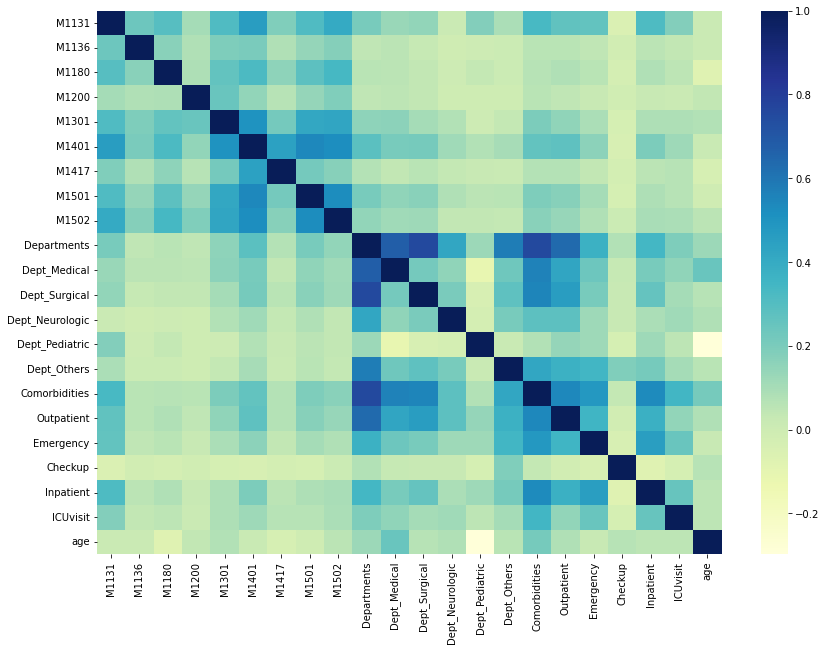

In [30]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(corr, cmap="YlGnBu")

In [31]:
# service_data

In [32]:
cluster_data = pd.read_csv('cluster_data.csv')
cluster_data

,ID,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_y,gender,age,clusters
0,0,0,0,2,2,0,0,0,0,0,...,0,1,53,0,0,6,0,1,5,1
1,1,7,5,59,50,19,0,3,5,0,...,1,0,9,0,0,0,0,0,4,0
2,2,41,14,181,115,6,0,14,32,3,...,2,0,31,1,1,4,0,0,5,0
3,3,5,1,53,24,0,0,0,7,0,...,2,0,22,0,0,4,0,0,4,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,38,2,0,4,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,26923,9,3,26,33,8,3,3,10,0,...,1,0,9,0,0,2,0,1,2,1
26924,26924,16,6,75,37,2,0,7,18,1,...,0,0,6,0,0,1,0,1,5,1
26925,26925,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,3,0
26926,26926,2,2,3,0,0,0,1,2,0,...,0,0,2,0,0,0,0,0,3,0


In [33]:
cluster_data.columns

Index(['ID', 'M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180',
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409',
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600', 'dept1', 'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7',
       'dept8', 'dept9', 'kcd1', 'kcd2', 'kcd3', 'kcd4', 'kcd5', 'kcd6',
       'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12', 'kcd13', 'kcd14',
       'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20', 'kcd21', 'kcd22',
       'visit_type1', 'visit_type2', 'visit_type3', 'visit_type4', 'ICU_y',
       'gender', 'age', 'clusters'],
      dtype='object')

In [34]:
cluster_data.drop(columns = [ 'dept1', 'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7',
       'dept8', 'dept9', 'kcd1', 'kcd2', 'kcd3', 'kcd4', 'kcd5', 'kcd6',
       'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12', 'kcd13', 'kcd14',
       'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20', 'kcd21', 'kcd22',
       'visit_type1', 'visit_type2', 'visit_type3', 'visit_type4', 'ICU_y',
       'gender', 'age'], inplace=True)

In [35]:
cluster_data.columns

Index(['ID', 'M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180',
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409',
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600', 'clusters'],
      dtype='object')

In [36]:
selected_data = cluster_data.loc[:, ['M1101', 'M1131', 'M1136', 'M1180', 'M1200', 'M1301', 'M1401', 'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5600']]
selected_data

,M1101,M1131,M1136,M1180,M1200,M1301,M1401,M1417,M1501,M1502,M5100,M5200,M5600
0,0,2,0,0,0,0,0,0,0,0,17,89,7
1,7,59,0,3,5,1,28,2,5,2,0,0,0
2,41,181,0,14,32,15,67,0,53,24,0,0,0
3,5,53,0,0,7,2,9,1,2,4,0,0,0
4,0,0,0,0,0,0,0,0,0,0,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,9,26,3,3,10,0,32,24,5,5,8,14,2
26924,16,75,0,7,18,10,39,0,49,5,0,0,0
26925,0,1,0,0,0,0,3,0,1,0,0,0,0
26926,2,3,0,1,2,0,9,1,1,0,0,0,0


In [37]:
# selected_data = cluster_data.loc[:, ['M1101', 'M1131', 'M1136', 'M1180', 'M1200', 'M1301', 'M1401', 'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'dept1', 'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7',
#        'dept8', 'dept9', 'kcd1', 'kcd2', 'kcd3', 'kcd4', 'kcd5', 'kcd6',
#        'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12', 'kcd13', 'kcd14',
#        'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20', 'kcd21', 'kcd22',
#        'visit_type1', 'visit_type2', 'visit_type3', 'visit_type4', 'ICU_y',
#        'age', ]]
# selected_data

In [38]:
# selected_data.describe()

In [39]:
# selected_data.std()

In [40]:
cluster_data.columns

Index(['ID', 'M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180',
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409',
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600', 'clusters'],
      dtype='object')

In [41]:
sdfasdf

NameError: name 'sdfasdf' is not defined

In [ ]:
cluster_data.columns

In [189]:
cluster_data = cluster_data.replace('B', 1)
cluster_data = cluster_data.replace('A', 0)

In [197]:
X = cluster_data.loc[:, ['M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180',
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409',
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600']]
Y = cluster_data.iloc[:, -1]
X

,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,M1206,...,M1409,M1417,M1501,M1502,M5100,M5200,M5221,M5222,M5225,M5600
0,0,0,2,2,0,0,0,0,0,0,...,0,0,0,0,17,89,312,139,2,7
1,7,5,59,50,19,0,3,5,0,3,...,7,2,5,2,0,0,0,0,0,0
2,41,14,181,115,6,0,14,32,3,2,...,1,0,53,24,0,0,0,0,0,0
3,5,1,53,24,0,0,0,7,0,0,...,1,1,2,4,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,9,3,26,33,8,3,3,10,0,0,...,0,24,5,5,8,14,13,26,1,2
26924,16,6,75,37,2,0,7,18,1,1,...,0,0,49,5,0,0,0,0,0,0
26925,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
26926,2,2,3,0,0,0,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


In [192]:
X = X * 0.01

In [ ]:
 sm.add_constant(X)

In [196]:
sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,M1409,M1417,M1501,M1502,M5100,M5200,M5221,M5222,M5225,M5600
0,1.0,0,0,2,2,0,0,0,0,0,...,0,0,0,0,17,89,312,139,2,7
1,1.0,7,5,59,50,19,0,3,5,0,...,7,2,5,2,0,0,0,0,0,0
2,1.0,41,14,181,115,6,0,14,32,3,...,1,0,53,24,0,0,0,0,0,0
3,1.0,5,1,53,24,0,0,0,7,0,...,1,1,2,4,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,1.0,9,3,26,33,8,3,3,10,0,...,0,24,5,5,8,14,13,26,1,2
26924,1.0,16,6,75,37,2,0,7,18,1,...,0,0,49,5,0,0,0,0,0,0
26925,1.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
26926,1.0,2,2,3,0,0,0,1,2,0,...,0,1,1,0,0,0,0,0,0,0


In [199]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.Logit(Y,X)
results = model.fit()

print( results.summary() )

Optimization terminated successfully.
         Current function value: 0.682479
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               clusters   No. Observations:                26928
Model:                          Logit   Df Residuals:                    26903
Method:                           MLE   Df Model:                           24
Date:                Fri, 19 Aug 2022   Pseudo R-squ.:                 0.01498
Time:                        00:13:30   Log-Likelihood:                -18378.
converged:                       True   LL-Null:                       -18657.
Covariance Type:            nonrobust   LLR p-value:                8.523e-103
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0363      0.016     -2.289      0.022      -0.067      -0.005
M1101         -0.0035      0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# OR=np.exp(results.params)
# OR

# PT_Dx의 dept 처리

In [42]:
dx_1_data = pd.read_csv('dx_1.csv')

In [43]:
dx_1_data

,연구번호,date_of_Dx,KCD_code,Dx_dept,age1,KCD,dept1,dept2,dept3,dept4,dept5,dept6,dept7,dept8,dept9
0,1197419933,201001,C50,ONC,40,C,0,0,1,0,0,0,0,0,0
1,1196364709,201004,K86,GI,40,K,0,0,1,0,0,0,0,0,0
2,1196364685,201004,E71,PEM,0,E,0,0,0,0,0,0,0,0,1
3,1196364685,201004,D70,PEM,0,D,0,0,0,0,0,0,0,0,1
4,1196364685,201004,E72,PEM,0,E,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390573,1166750449,201810,E78,FM,50,E,0,0,0,0,0,0,1,0,0
2390574,1166750449,201810,I11,FM,50,I,0,0,0,0,0,0,1,0,0
2390575,1166750449,201810,M85,FM,50,M,0,0,0,0,0,0,1,0,0
2390576,1166750449,201810,Z29,FM,50,Z,0,0,0,0,0,0,1,0,0


In [44]:
sorted(dx_1_data[(dx_1_data['date_of_Dx']>=201512) & (dx_1_data['date_of_Dx']<=201806)]['date_of_Dx'].unique())

[201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806]

In [45]:
dx_1_data2 = dx_1_data[(dx_1_data['date_of_Dx']>=201512) & (dx_1_data['date_of_Dx']<=201806)].reset_index(drop=True)

In [46]:
dx_1_data2

,연구번호,date_of_Dx,KCD_code,Dx_dept,age1,KCD,dept1,dept2,dept3,dept4,dept5,dept6,dept7,dept8,dept9
0,1206572260,201512,Z52,NPH,60,Z,0,0,1,0,0,0,0,0,0
1,1206571846,201512,Z52,LTS,30,Z,0,0,0,0,1,0,0,0,0
2,1206565903,201512,M54,NS,30,M,0,1,0,0,0,0,0,0,0
3,1206565903,201512,M50,NS,30,M,0,1,0,0,0,0,0,0,0
4,1206563333,201512,C15,GI,60,C,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073643,1166758659,201806,R05,PLM,60,R,1,0,0,0,0,0,0,0,0
1073644,1166750073,201806,B18,GI,60,B,0,0,1,0,0,0,0,0,0
1073645,1166750073,201806,K21,GI,60,K,0,0,1,0,0,0,0,0,0
1073646,1166750073,201806,C22,GI,60,C,0,0,1,0,0,0,0,0,0


# 연구번호와 KCD_code가 중복 데이터 제거
* KCD1에 해당하는 병을 몇가지 가지고 있는지를 확인하기 위해서

In [47]:
q = pd.DataFrame(dx_1_data2, columns=['연구번호', 'KCD_code'])
q

,연구번호,KCD_code
0,1206572260,Z52
1,1206571846,Z52
2,1206565903,M54
3,1206565903,M50
4,1206563333,C15
...,...,...
1073643,1166758659,R05
1073644,1166750073,B18
1073645,1166750073,K21
1073646,1166750073,C22


In [48]:
q = q.drop_duplicates()
q.reset_index(drop=True, inplace=True)

In [49]:
q

,연구번호,KCD_code
0,1206572260,Z52
1,1206571846,Z52
2,1206565903,M54
3,1206565903,M50
4,1206563333,C15
...,...,...
182715,1166814474,K02
182716,1166804010,K56
182717,1166804010,K91
182718,1166804010,Y83


# kcd 파일을 dx_1_date2에 merge

In [50]:
KCD_data = pd.read_csv('KCD.csv')

In [51]:
KCD_data

,KCD_code,kcd
0,A01,kcd1
1,A02,kcd1
2,A04,kcd1
3,A05,kcd1
4,A06,kcd1
...,...,...
1582,Z94,kcd21
1583,Z95,kcd21
1584,Z96,kcd21
1585,Z97,kcd21


In [52]:
a = pd.merge(q, KCD_data, on='KCD_code')
a

,연구번호,KCD_code,kcd
0,1206572260,Z52,kcd21
1,1206571846,Z52,kcd21
2,1206499306,Z52,kcd21
3,1206492284,Z52,kcd21
4,1206484687,Z52,kcd21
...,...,...,...
181600,1180079523,V43,kcd20
181601,1209299599,D83,kcd3
181602,1177088643,A44,kcd1
181603,1168754516,O89,kcd15


In [53]:
len(a['연구번호'].unique())

29459

In [54]:
a[a['연구번호']==1206572260]

,연구번호,KCD_code,kcd
0,1206572260,Z52,kcd21
33507,1206572260,K29,kcd11
38184,1206572260,Z00,kcd21
41526,1206572260,Z88,kcd21
44311,1206572260,I10,kcd9
54981,1206572260,K31,kcd11


In [55]:
a.to_csv('kcd_data.csv', index=False)

# Dx_dept 중복데이터 제거

In [56]:
dx_1_data2

,연구번호,date_of_Dx,KCD_code,Dx_dept,age1,KCD,dept1,dept2,dept3,dept4,dept5,dept6,dept7,dept8,dept9
0,1206572260,201512,Z52,NPH,60,Z,0,0,1,0,0,0,0,0,0
1,1206571846,201512,Z52,LTS,30,Z,0,0,0,0,1,0,0,0,0
2,1206565903,201512,M54,NS,30,M,0,1,0,0,0,0,0,0,0
3,1206565903,201512,M50,NS,30,M,0,1,0,0,0,0,0,0,0
4,1206563333,201512,C15,GI,60,C,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073643,1166758659,201806,R05,PLM,60,R,1,0,0,0,0,0,0,0,0
1073644,1166750073,201806,B18,GI,60,B,0,0,1,0,0,0,0,0,0
1073645,1166750073,201806,K21,GI,60,K,0,0,1,0,0,0,0,0,0
1073646,1166750073,201806,C22,GI,60,C,0,0,1,0,0,0,0,0,0


In [57]:
dx_1_data2.columns

Index(['연구번호', 'date_of_Dx', 'KCD_code', 'Dx_dept', 'age1', 'KCD', 'dept1',
       'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7', 'dept8', 'dept9'],
      dtype='object')

In [58]:
# k는 dept를 중복데이터 제거한 것.

In [59]:
q = pd.DataFrame(dx_1_data2, columns=['연구번호', 'Dx_dept'])
q

,연구번호,Dx_dept
0,1206572260,NPH
1,1206571846,LTS
2,1206565903,NS
3,1206565903,NS
4,1206563333,GI
...,...,...
1073643,1166758659,PLM
1073644,1166750073,GI
1073645,1166750073,GI
1073646,1166750073,GI


In [60]:
q = q.drop_duplicates()
q.reset_index(drop=True, inplace=True)

In [61]:
q

,연구번호,Dx_dept
0,1206572260,NPH
1,1206571846,LTS
2,1206565903,NS
3,1206563333,GI
4,1206559059,GI
...,...,...
93141,1166882795,ENT
93142,1166882795,PLM
93143,1166804010,INF
93144,1166804010,ER


In [62]:
len(q['연구번호'].unique())

29459

In [63]:
q.to_csv('dept_data.csv', index=False)

# PT_visit 처리

In [64]:
visit_re_data = pd.read_csv('visit_re.csv')

In [65]:
visit_re_data

,Unnamed: 0,연구번호,visit_type,ICU_stay,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y
0,1,1206727924,E,n,0,1,0,0,1,0
1,2,1206722674,O,n,1,0,0,0,1,0
2,3,1206720647,O,n,1,0,0,0,1,0
3,4,1206720647,O,n,1,0,0,0,1,0
4,5,1206718720,O,n,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1549696,1549697,1166763476,O,n,1,0,0,0,1,0
1549697,1549698,1166758659,O,n,1,0,0,0,1,0
1549698,1549699,1166758659,O,n,1,0,0,0,1,0
1549699,1549700,1166750073,O,n,1,0,0,0,1,0


In [66]:
visit_re_data.drop(columns=['Unnamed: 0', 'visit_type', 'ICU_stay'], inplace=True)

In [67]:
visit_re_data

,연구번호,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y
0,1206727924,0,1,0,0,1,0
1,1206722674,1,0,0,0,1,0
2,1206720647,1,0,0,0,1,0
3,1206720647,1,0,0,0,1,0
4,1206718720,1,0,0,0,1,0
...,...,...,...,...,...,...,...
1549696,1166763476,1,0,0,0,1,0
1549697,1166758659,1,0,0,0,1,0
1549698,1166758659,1,0,0,0,1,0
1549699,1166750073,1,0,0,0,1,0


In [68]:
visit_re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549701 entries, 0 to 1549700
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   연구번호         1549701 non-null  int64
 1   visit_type1  1549701 non-null  int64
 2   visit_type2  1549701 non-null  int64
 3   visit_type3  1549701 non-null  int64
 4   visit_type4  1549701 non-null  int64
 5   ICU_n        1549701 non-null  int64
 6   ICU_y        1549701 non-null  int64
dtypes: int64(7)
memory usage: 82.8 MB


In [69]:
pt_visit_data = visit_re_data.groupby(['연구번호']).sum().reset_index()
pt_visit_data

,연구번호,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y
0,1166750073,53,0,0,6,59,0
1,1166750449,9,0,0,0,9,0
2,1166751153,7,0,0,0,7,0
3,1166752382,31,1,1,4,37,0
4,1166753253,22,0,0,4,26,0
...,...,...,...,...,...,...,...
60039,1211085828,2,0,0,0,2,0
60040,1211089119,1,0,0,0,1,0
60041,1211089711,1,0,0,0,1,0
60042,1211095016,1,0,0,0,1,0


In [70]:
len(pt_visit_data['연구번호'].unique())

60044

In [71]:
pt_visit_data['연구번호'] = pt_visit_data['연구번호'].astype(object)

In [72]:
pt_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60044 entries, 0 to 60043
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연구번호         60044 non-null  object
 1   visit_type1  60044 non-null  int64 
 2   visit_type2  60044 non-null  int64 
 3   visit_type3  60044 non-null  int64 
 4   visit_type4  60044 non-null  int64 
 5   ICU_n        60044 non-null  int64 
 6   ICU_y        60044 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 3.2+ MB


# kcd_data 처리

In [73]:
kcd_data_0807_re = pd.read_csv('kcd_data_0807_re.csv')
kcd_data_0807_re

,Unnamed: 0,연구번호,KCD_code,kcd,kcd1,kcd2,kcd3,kcd4,kcd5,kcd6,...,kcd13,kcd14,kcd15,kcd16,kcd17,kcd18,kcd19,kcd20,kcd21,kcd22
0,1,1.206572e+09,Z52,kcd21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1.206572e+09,Z52,kcd21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1.206499e+09,Z52,kcd21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1.206492e+09,Z52,kcd21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1.206485e+09,Z52,kcd21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,181601,1.180080e+09,V43,kcd20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
181601,181602,1.209300e+09,D83,kcd3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181602,181603,1.177089e+09,A44,kcd1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181603,181604,1.168755e+09,O89,kcd15,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
kcd_data_0807_re.columns

Index(['Unnamed: 0', '연구번호', 'KCD_code', 'kcd', 'kcd1', 'kcd2', 'kcd3', 'kcd4',
       'kcd5', 'kcd6', 'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12',
       'kcd13', 'kcd14', 'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20',
       'kcd21', 'kcd22'],
      dtype='object')

In [75]:
kcd_data_0807_re.drop(columns=['Unnamed: 0', 'KCD_code', 'kcd'], inplace=True)

In [76]:
kcd_data_0807_re['연구번호'] = kcd_data_0807_re['연구번호'].astype('int64')
kcd_data_0807_re['연구번호'] = kcd_data_0807_re['연구번호'].astype('object')

In [77]:
kcd_data_0807_re

,연구번호,kcd1,kcd2,kcd3,kcd4,kcd5,kcd6,kcd7,kcd8,kcd9,...,kcd13,kcd14,kcd15,kcd16,kcd17,kcd18,kcd19,kcd20,kcd21,kcd22
0,1206572260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1206571846,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1206499306,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1206492284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1206484687,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,1180079523,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
181601,1209299599,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181602,1177088643,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181603,1168754516,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
kcd_data_0807_re = kcd_data_0807_re.groupby(['연구번호']).sum().reset_index()
kcd_data_0807_re

,연구번호,kcd1,kcd2,kcd3,kcd4,kcd5,kcd6,kcd7,kcd8,kcd9,...,kcd13,kcd14,kcd15,kcd16,kcd17,kcd18,kcd19,kcd20,kcd21,kcd22
0,1166750073,1,2,0,0,0,0,0,0,2,...,1,1,0,0,0,2,0,0,0,1
1,1166750449,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
2,1166752382,0,1,0,1,0,1,1,0,1,...,5,1,0,0,0,3,0,0,2,0
3,1166753253,1,1,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,2,0
4,1166753270,1,0,0,0,0,0,0,0,3,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29462,1211070934,0,2,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0
29463,1211074051,0,2,0,3,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
29464,1211085378,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29465,1211085828,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
len(kcd_data_0807_re['연구번호'].unique())

29467

# dept 데이터 처리

In [80]:
dept_data_0807_re = pd.read_csv('dept_data_0807_re.csv')
dept_data_0807_re

,Unnamed: 0,연구번호,Dx_dept,dept1,dept2,dept3,dept4,dept5,dept6,dept7,dept8,dept9
0,1,1206572260,NPH,0,0,1,0,0,0,0,0,0
1,2,1206571846,LTS,0,0,0,0,1,0,0,0,0
2,3,1206565903,NS,0,1,0,0,0,0,0,0,0
3,4,1206563333,GI,0,0,1,0,0,0,0,0,0
4,5,1206559059,GI,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93141,93142,1166882795,ENT,0,0,0,0,0,1,0,0,0
93142,93143,1166882795,PLM,1,0,0,0,0,0,0,0,0
93143,93144,1166804010,INF,0,0,1,0,0,0,0,0,0
93144,93145,1166804010,ER,0,0,0,0,0,0,1,0,0


In [81]:
dept_data_0807_re.columns

Index(['Unnamed: 0', '연구번호', 'Dx_dept', 'dept1', 'dept2', 'dept3', 'dept4',
       'dept5', 'dept6', 'dept7', 'dept8', 'dept9'],
      dtype='object')

In [82]:
dept_data_0807_re.drop(columns=['Unnamed: 0', 'Dx_dept'], inplace=True)

In [83]:
dept_data_0807_re['연구번호'] = dept_data_0807_re['연구번호'].astype('object')

In [84]:
dept_data_0807_re

,연구번호,dept1,dept2,dept3,dept4,dept5,dept6,dept7,dept8,dept9
0,1206572260,0,0,1,0,0,0,0,0,0
1,1206571846,0,0,0,0,1,0,0,0,0
2,1206565903,0,1,0,0,0,0,0,0,0
3,1206563333,0,0,1,0,0,0,0,0,0
4,1206559059,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
93141,1166882795,0,0,0,0,0,1,0,0,0
93142,1166882795,1,0,0,0,0,0,0,0,0
93143,1166804010,0,0,1,0,0,0,0,0,0
93144,1166804010,0,0,0,0,0,0,1,0,0


In [85]:
dept_data_0807_re = dept_data_0807_re.groupby(['연구번호']).sum().reset_index()
dept_data_0807_re

,연구번호,dept1,dept2,dept3,dept4,dept5,dept6,dept7,dept8,dept9
0,1166750073,2,0,1,0,1,1,0,0,0
1,1166750449,0,1,0,0,0,1,1,0,0
2,1166752382,0,0,1,0,0,4,2,1,0
3,1166753253,0,0,1,0,0,2,0,0,0
4,1166753270,2,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29454,1211070934,0,0,2,0,1,0,0,0,0
29455,1211074051,0,0,1,0,2,0,0,0,0
29456,1211085378,0,1,0,0,0,0,0,0,0
29457,1211085828,0,0,0,0,1,0,0,0,0


# service, dept, kcd, pt_visit 데이터 merge

In [86]:
final_data = pd.merge(service_data, dept_data_0807_re)
final_data

,연구번호,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,M5600,dept1,dept2,dept3,dept4,dept5,dept6,dept7,dept8,dept9
0,1166750073,0,0,2,2,0,0,0,0,0,...,7,2,0,1,0,1,1,0,0,0
1,1166750449,7,5,59,50,19,0,3,5,0,...,0,0,1,0,0,0,1,1,0,0
2,1166752382,41,14,181,115,6,0,14,32,3,...,0,0,0,1,0,0,4,2,1,0
3,1166753253,5,1,53,24,0,0,0,7,0,...,0,0,0,1,0,0,2,0,0,0
4,1166753270,0,0,0,0,0,0,0,0,0,...,0,2,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26932,1211070934,9,3,26,33,8,3,3,10,0,...,2,0,0,2,0,1,0,0,0,0
26933,1211074051,16,6,75,37,2,0,7,18,1,...,0,0,0,1,0,2,0,0,0,0
26934,1211085378,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
26935,1211085828,2,2,3,0,0,0,1,2,0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
final_data = pd.merge(final_data, kcd_data_0807_re)
final_data

,연구번호,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd13,kcd14,kcd15,kcd16,kcd17,kcd18,kcd19,kcd20,kcd21,kcd22
0,1166750073,0,0,2,2,0,0,0,0,0,...,1,1,0,0,0,2,0,0,0,1
1,1166750449,7,5,59,50,19,0,3,5,0,...,1,0,0,0,0,1,0,0,1,0
2,1166752382,41,14,181,115,6,0,14,32,3,...,5,1,0,0,0,3,0,0,2,0
3,1166753253,5,1,53,24,0,0,0,7,0,...,0,0,0,0,0,0,0,0,2,0
4,1166753270,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,1211070934,9,3,26,33,8,3,3,10,0,...,2,0,0,0,0,0,0,0,1,0
26924,1211074051,16,6,75,37,2,0,7,18,1,...,1,0,0,0,0,0,0,0,0,0
26925,1211085378,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26926,1211085828,2,2,3,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
final_data = pd.merge(final_data, pt_visit_data)
final_data

,연구번호,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd19,kcd20,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y
0,1166750073,0,0,2,2,0,0,0,0,0,...,0,0,0,1,53,0,0,6,59,0
1,1166750449,7,5,59,50,19,0,3,5,0,...,0,0,1,0,9,0,0,0,9,0
2,1166752382,41,14,181,115,6,0,14,32,3,...,0,0,2,0,31,1,1,4,37,0
3,1166753253,5,1,53,24,0,0,0,7,0,...,0,0,2,0,22,0,0,4,26,0
4,1166753270,0,0,0,0,0,0,0,0,0,...,0,0,0,0,38,2,0,4,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,1211070934,9,3,26,33,8,3,3,10,0,...,0,0,1,0,9,0,0,2,11,0
26924,1211074051,16,6,75,37,2,0,7,18,1,...,0,0,0,0,6,0,0,1,7,0
26925,1211085378,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,2,0
26926,1211085828,2,2,3,0,0,0,1,2,0,...,0,0,0,0,2,0,0,0,2,0


In [89]:
final_data = pd.merge(final_data, Gender_data)
final_data

,연구번호,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd20,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y,성별코드
0,1166750073,0,0,2,2,0,0,0,0,0,...,0,0,1,53,0,0,6,59,0,M
1,1166750449,7,5,59,50,19,0,3,5,0,...,0,1,0,9,0,0,0,9,0,F
2,1166752382,41,14,181,115,6,0,14,32,3,...,0,2,0,31,1,1,4,37,0,F
3,1166753253,5,1,53,24,0,0,0,7,0,...,0,2,0,22,0,0,4,26,0,F
4,1166753270,0,0,0,0,0,0,0,0,0,...,0,0,0,38,2,0,4,44,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,1211070934,9,3,26,33,8,3,3,10,0,...,0,1,0,9,0,0,2,11,0,M
26924,1211074051,16,6,75,37,2,0,7,18,1,...,0,0,0,6,0,0,1,7,0,M
26925,1211085378,0,0,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,F
26926,1211085828,2,2,3,0,0,0,1,2,0,...,0,0,0,2,0,0,0,2,0,F


In [90]:
final_data = pd.merge(final_data, Age_data)
final_data

,연구번호,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y,성별코드,연령 10단위
0,1166750073,0,0,2,2,0,0,0,0,0,...,0,1,53,0,0,6,59,0,M,60
1,1166750449,7,5,59,50,19,0,3,5,0,...,1,0,9,0,0,0,9,0,F,50
2,1166752382,41,14,181,115,6,0,14,32,3,...,2,0,31,1,1,4,37,0,F,60
3,1166753253,5,1,53,24,0,0,0,7,0,...,2,0,22,0,0,4,26,0,F,50
4,1166753270,0,0,0,0,0,0,0,0,0,...,0,0,38,2,0,4,44,0,F,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,1211070934,9,3,26,33,8,3,3,10,0,...,1,0,9,0,0,2,11,0,M,30
26924,1211074051,16,6,75,37,2,0,7,18,1,...,0,0,6,0,0,1,7,0,M,60
26925,1211085378,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,F,40
26926,1211085828,2,2,3,0,0,0,1,2,0,...,0,0,2,0,0,0,2,0,F,40


In [91]:
final_data.columns = ['ID', 'M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180', \
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409', \
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225', \
       'M5600', 'dept1', 'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7', \
       'dept8', 'dept9', 'kcd1', 'kcd2', 'kcd3', 'kcd4', 'kcd5', 'kcd6', \
       'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12', 'kcd13', 'kcd14', \
       'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20', 'kcd21', 'kcd22', \
       'visit_type1', 'visit_type2', 'visit_type3', 'visit_type4', 'ICU_n', \
       'ICU_y', 'gender', 'age']

In [92]:
final_data.columns

Index(['ID', 'M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180',
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409',
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600', 'dept1', 'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7',
       'dept8', 'dept9', 'kcd1', 'kcd2', 'kcd3', 'kcd4', 'kcd5', 'kcd6',
       'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12', 'kcd13', 'kcd14',
       'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20', 'kcd21', 'kcd22',
       'visit_type1', 'visit_type2', 'visit_type3', 'visit_type4', 'ICU_n',
       'ICU_y', 'gender', 'age'],
      dtype='object')

In [93]:
final_data.to_csv('final_data.csv', index=False)

# dictionary화

In [94]:
final_data

,ID,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y,gender,age
0,1166750073,0,0,2,2,0,0,0,0,0,...,0,1,53,0,0,6,59,0,M,60
1,1166750449,7,5,59,50,19,0,3,5,0,...,1,0,9,0,0,0,9,0,F,50
2,1166752382,41,14,181,115,6,0,14,32,3,...,2,0,31,1,1,4,37,0,F,60
3,1166753253,5,1,53,24,0,0,0,7,0,...,2,0,22,0,0,4,26,0,F,50
4,1166753270,0,0,0,0,0,0,0,0,0,...,0,0,38,2,0,4,44,0,F,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,1211070934,9,3,26,33,8,3,3,10,0,...,1,0,9,0,0,2,11,0,M,30
26924,1211074051,16,6,75,37,2,0,7,18,1,...,0,0,6,0,0,1,7,0,M,60
26925,1211085378,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,F,40
26926,1211085828,2,2,3,0,0,0,1,2,0,...,0,0,2,0,0,0,2,0,F,40


In [95]:
ID_dict = dict(final_data['ID'])
ID_dict

{0: 1166750073,
 1: 1166750449,
 2: 1166752382,
 3: 1166753253,
 4: 1166753270,
 5: 1166756322,
 6: 1166758659,
 7: 1166761672,
 8: 1166763476,
 9: 1166764441,
 10: 1166765876,
 11: 1166766193,
 12: 1166772867,
 13: 1166773208,
 14: 1166773567,
 15: 1166774608,
 16: 1166774623,
 17: 1166774654,
 18: 1166777434,
 19: 1166786347,
 20: 1166793616,
 21: 1166801401,
 22: 1166802060,
 23: 1166802488,
 24: 1166804010,
 25: 1166804237,
 26: 1166805696,
 27: 1166807591,
 28: 1166810183,
 29: 1166814421,
 30: 1166814474,
 31: 1166814544,
 32: 1166816602,
 33: 1166820239,
 34: 1166822910,
 35: 1166825251,
 36: 1166825638,
 37: 1166827523,
 38: 1166828167,
 39: 1166828393,
 40: 1166833259,
 41: 1166840644,
 42: 1166841918,
 43: 1166843214,
 44: 1166843737,
 45: 1166847147,
 46: 1166847914,
 47: 1166848778,
 48: 1166852554,
 49: 1166856308,
 50: 1166859740,
 51: 1166860081,
 52: 1166864386,
 53: 1166864937,
 54: 1166865877,
 55: 1166866849,
 56: 1166867065,
 57: 1166869597,
 58: 1166875672,
 59: 11

In [96]:
ID_dict_reversed = {v: k for k, v in ID_dict.items()}
ID_dict_reversed

{1166750073: 0,
 1166750449: 1,
 1166752382: 2,
 1166753253: 3,
 1166753270: 4,
 1166756322: 5,
 1166758659: 6,
 1166761672: 7,
 1166763476: 8,
 1166764441: 9,
 1166765876: 10,
 1166766193: 11,
 1166772867: 12,
 1166773208: 13,
 1166773567: 14,
 1166774608: 15,
 1166774623: 16,
 1166774654: 17,
 1166777434: 18,
 1166786347: 19,
 1166793616: 20,
 1166801401: 21,
 1166802060: 22,
 1166802488: 23,
 1166804010: 24,
 1166804237: 25,
 1166805696: 26,
 1166807591: 27,
 1166810183: 28,
 1166814421: 29,
 1166814474: 30,
 1166814544: 31,
 1166816602: 32,
 1166820239: 33,
 1166822910: 34,
 1166825251: 35,
 1166825638: 36,
 1166827523: 37,
 1166828167: 38,
 1166828393: 39,
 1166833259: 40,
 1166840644: 41,
 1166841918: 42,
 1166843214: 43,
 1166843737: 44,
 1166847147: 45,
 1166847914: 46,
 1166848778: 47,
 1166852554: 48,
 1166856308: 49,
 1166859740: 50,
 1166860081: 51,
 1166864386: 52,
 1166864937: 53,
 1166865877: 54,
 1166866849: 55,
 1166867065: 56,
 1166869597: 57,
 1166875672: 58,
 116687

In [97]:
variable_columns = list(final_data.columns)[1:]

In [98]:
variable_dict_reversed = {string : i for i,string in enumerate(variable_columns)}
variable_dict_reversed

{'M1101': 0,
 'M1102': 1,
 'M1131': 2,
 'M1132': 3,
 'M1135': 4,
 'M1136': 5,
 'M1180': 6,
 'M1200': 7,
 'M1201': 8,
 'M1206': 9,
 'M1301': 10,
 'M1311': 11,
 'M1401': 12,
 'M1403': 13,
 'M1409': 14,
 'M1417': 15,
 'M1501': 16,
 'M1502': 17,
 'M5100': 18,
 'M5200': 19,
 'M5221': 20,
 'M5222': 21,
 'M5225': 22,
 'M5600': 23,
 'dept1': 24,
 'dept2': 25,
 'dept3': 26,
 'dept4': 27,
 'dept5': 28,
 'dept6': 29,
 'dept7': 30,
 'dept8': 31,
 'dept9': 32,
 'kcd1': 33,
 'kcd2': 34,
 'kcd3': 35,
 'kcd4': 36,
 'kcd5': 37,
 'kcd6': 38,
 'kcd7': 39,
 'kcd8': 40,
 'kcd9': 41,
 'kcd10': 42,
 'kcd11': 43,
 'kcd12': 44,
 'kcd13': 45,
 'kcd14': 46,
 'kcd15': 47,
 'kcd16': 48,
 'kcd17': 49,
 'kcd18': 50,
 'kcd19': 51,
 'kcd20': 52,
 'kcd21': 53,
 'kcd22': 54,
 'visit_type1': 55,
 'visit_type2': 56,
 'visit_type3': 57,
 'visit_type4': 58,
 'ICU_n': 59,
 'ICU_y': 60,
 'gender': 61,
 'age': 62}

In [99]:
variable_dict = {v: k for k, v in variable_dict_reversed.items()}
variable_dict

{0: 'M1101',
 1: 'M1102',
 2: 'M1131',
 3: 'M1132',
 4: 'M1135',
 5: 'M1136',
 6: 'M1180',
 7: 'M1200',
 8: 'M1201',
 9: 'M1206',
 10: 'M1301',
 11: 'M1311',
 12: 'M1401',
 13: 'M1403',
 14: 'M1409',
 15: 'M1417',
 16: 'M1501',
 17: 'M1502',
 18: 'M5100',
 19: 'M5200',
 20: 'M5221',
 21: 'M5222',
 22: 'M5225',
 23: 'M5600',
 24: 'dept1',
 25: 'dept2',
 26: 'dept3',
 27: 'dept4',
 28: 'dept5',
 29: 'dept6',
 30: 'dept7',
 31: 'dept8',
 32: 'dept9',
 33: 'kcd1',
 34: 'kcd2',
 35: 'kcd3',
 36: 'kcd4',
 37: 'kcd5',
 38: 'kcd6',
 39: 'kcd7',
 40: 'kcd8',
 41: 'kcd9',
 42: 'kcd10',
 43: 'kcd11',
 44: 'kcd12',
 45: 'kcd13',
 46: 'kcd14',
 47: 'kcd15',
 48: 'kcd16',
 49: 'kcd17',
 50: 'kcd18',
 51: 'kcd19',
 52: 'kcd20',
 53: 'kcd21',
 54: 'kcd22',
 55: 'visit_type1',
 56: 'visit_type2',
 57: 'visit_type3',
 58: 'visit_type4',
 59: 'ICU_n',
 60: 'ICU_y',
 61: 'gender',
 62: 'age'}

# ID를 index 0~26927로 변경

In [100]:
# final_data['ID'].to_csv('ID_data.csv', index=False)

In [101]:
from sklearn.preprocessing import LabelEncoder

# service 변수 수치형으로 변환
le = LabelEncoder()
result = le.fit_transform(final_data['ID'])
print(result)

[    0     1     2 ... 26925 26926 26927]


In [102]:
le.classes_

array([1166750073, 1166750449, 1166752382, ..., 1211085378, 1211085828,
       1211095016], dtype=object)

In [103]:
final_data['ID'] = result

In [104]:
final_data

,ID,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y,gender,age
0,0,0,0,2,2,0,0,0,0,0,...,0,1,53,0,0,6,59,0,M,60
1,1,7,5,59,50,19,0,3,5,0,...,1,0,9,0,0,0,9,0,F,50
2,2,41,14,181,115,6,0,14,32,3,...,2,0,31,1,1,4,37,0,F,60
3,3,5,1,53,24,0,0,0,7,0,...,2,0,22,0,0,4,26,0,F,50
4,4,0,0,0,0,0,0,0,0,0,...,0,0,38,2,0,4,44,0,F,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,26923,9,3,26,33,8,3,3,10,0,...,1,0,9,0,0,2,11,0,M,30
26924,26924,16,6,75,37,2,0,7,18,1,...,0,0,6,0,0,1,7,0,M,60
26925,26925,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,F,40
26926,26926,2,2,3,0,0,0,1,2,0,...,0,0,2,0,0,0,2,0,F,40


# gender 및 age를 integer

In [105]:
from sklearn.preprocessing import LabelEncoder

# service 변수 수치형으로 변환
le = LabelEncoder()
result = le.fit_transform(final_data['gender'])
print(result)

[1 0 0 ... 0 0 1]


In [106]:
le.classes_

array(['F', 'M'], dtype=object)

In [107]:
final_data['gender'] = result

In [108]:
final_data

,ID,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_n,ICU_y,gender,age
0,0,0,0,2,2,0,0,0,0,0,...,0,1,53,0,0,6,59,0,1,60
1,1,7,5,59,50,19,0,3,5,0,...,1,0,9,0,0,0,9,0,0,50
2,2,41,14,181,115,6,0,14,32,3,...,2,0,31,1,1,4,37,0,0,60
3,3,5,1,53,24,0,0,0,7,0,...,2,0,22,0,0,4,26,0,0,50
4,4,0,0,0,0,0,0,0,0,0,...,0,0,38,2,0,4,44,0,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,26923,9,3,26,33,8,3,3,10,0,...,1,0,9,0,0,2,11,0,1,30
26924,26924,16,6,75,37,2,0,7,18,1,...,0,0,6,0,0,1,7,0,1,60
26925,26925,0,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,0,40
26926,26926,2,2,3,0,0,0,1,2,0,...,0,0,2,0,0,0,2,0,0,40


In [109]:
from sklearn.preprocessing import LabelEncoder

# service 변수 수치형으로 변환
le = LabelEncoder()
result = le.fit_transform(final_data['age'])
print(result)

[5 4 5 ... 3 3 2]


In [110]:
le.classes_

array([10, 20, 30, 40, 50, 60, 70, 80], dtype=int64)

In [111]:
final_data['age'] = result

# ICU_n 삭제

In [112]:
final_data.drop(columns=['ICU_n'], inplace=True)

In [113]:
final_data['ICU_y'].unique()

array([0, 2, 3, 1, 4, 5, 6], dtype=int64)

In [114]:
final_data

,ID,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd20,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_y,gender,age
0,0,0,0,2,2,0,0,0,0,0,...,0,0,1,53,0,0,6,0,1,5
1,1,7,5,59,50,19,0,3,5,0,...,0,1,0,9,0,0,0,0,0,4
2,2,41,14,181,115,6,0,14,32,3,...,0,2,0,31,1,1,4,0,0,5
3,3,5,1,53,24,0,0,0,7,0,...,0,2,0,22,0,0,4,0,0,4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,38,2,0,4,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,26923,9,3,26,33,8,3,3,10,0,...,0,1,0,9,0,0,2,0,1,2
26924,26924,16,6,75,37,2,0,7,18,1,...,0,0,0,6,0,0,1,0,1,5
26925,26925,0,0,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,3
26926,26926,2,2,3,0,0,0,1,2,0,...,0,0,0,2,0,0,0,0,0,3


In [115]:
m = final_data.iloc[:, 1:]
m

,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,M1206,...,kcd20,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_y,gender,age
0,0,0,2,2,0,0,0,0,0,0,...,0,0,1,53,0,0,6,0,1,5
1,7,5,59,50,19,0,3,5,0,3,...,0,1,0,9,0,0,0,0,0,4
2,41,14,181,115,6,0,14,32,3,2,...,0,2,0,31,1,1,4,0,0,5
3,5,1,53,24,0,0,0,7,0,0,...,0,2,0,22,0,0,4,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,38,2,0,4,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,9,3,26,33,8,3,3,10,0,0,...,0,1,0,9,0,0,2,0,1,2
26924,16,6,75,37,2,0,7,18,1,1,...,0,0,0,6,0,0,1,0,1,5
26925,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,3
26926,2,2,3,0,0,0,1,2,0,0,...,0,0,0,2,0,0,0,0,0,3


In [116]:
(m - m.min()) / (m.max()-m.min())

,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,M1206,...,kcd20,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_y,gender,age
0,0.000000,0.000000,0.000273,0.000129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.25,0.056684,0.000000,0.0,0.093750,0.0,1.0,0.714286
1,0.022654,0.025253,0.008057,0.003230,0.002119,0.000000,0.012712,0.001398,0.000000,0.000518,...,0.0,0.142857,0.00,0.009626,0.000000,0.0,0.000000,0.0,0.0,0.571429
2,0.132686,0.070707,0.024717,0.007428,0.000669,0.000000,0.059322,0.008949,0.000626,0.000345,...,0.0,0.285714,0.00,0.033155,0.012048,0.2,0.062500,0.0,0.0,0.714286
3,0.016181,0.005051,0.007237,0.001550,0.000000,0.000000,0.000000,0.001957,0.000000,0.000000,...,0.0,0.285714,0.00,0.023529,0.000000,0.0,0.062500,0.0,0.0,0.571429
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.040642,0.024096,0.0,0.062500,0.0,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,0.029126,0.015152,0.003550,0.002132,0.000892,0.003517,0.012712,0.002796,0.000000,0.000000,...,0.0,0.142857,0.00,0.009626,0.000000,0.0,0.031250,0.0,1.0,0.285714
26924,0.051780,0.030303,0.010242,0.002390,0.000223,0.000000,0.029661,0.005034,0.000209,0.000173,...,0.0,0.000000,0.00,0.006417,0.000000,0.0,0.015625,0.0,1.0,0.714286
26925,0.000000,0.000000,0.000137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.002139,0.000000,0.0,0.000000,0.0,0.0,0.428571
26926,0.006472,0.010101,0.000410,0.000000,0.000000,0.000000,0.004237,0.000559,0.000000,0.000000,...,0.0,0.000000,0.00,0.002139,0.000000,0.0,0.000000,0.0,0.0,0.428571


In [117]:
final_data_normalized = pd.concat([final_data.iloc[:, 0:1], (m - m.min()) / (m.max()-m.min())], axis=1)
final_data_normalized

,ID,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd20,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_y,gender,age
0,0,0.000000,0.000000,0.000273,0.000129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.25,0.056684,0.000000,0.0,0.093750,0.0,1.0,0.714286
1,1,0.022654,0.025253,0.008057,0.003230,0.002119,0.000000,0.012712,0.001398,0.000000,...,0.0,0.142857,0.00,0.009626,0.000000,0.0,0.000000,0.0,0.0,0.571429
2,2,0.132686,0.070707,0.024717,0.007428,0.000669,0.000000,0.059322,0.008949,0.000626,...,0.0,0.285714,0.00,0.033155,0.012048,0.2,0.062500,0.0,0.0,0.714286
3,3,0.016181,0.005051,0.007237,0.001550,0.000000,0.000000,0.000000,0.001957,0.000000,...,0.0,0.285714,0.00,0.023529,0.000000,0.0,0.062500,0.0,0.0,0.571429
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.040642,0.024096,0.0,0.062500,0.0,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,26923,0.029126,0.015152,0.003550,0.002132,0.000892,0.003517,0.012712,0.002796,0.000000,...,0.0,0.142857,0.00,0.009626,0.000000,0.0,0.031250,0.0,1.0,0.285714
26924,26924,0.051780,0.030303,0.010242,0.002390,0.000223,0.000000,0.029661,0.005034,0.000209,...,0.0,0.000000,0.00,0.006417,0.000000,0.0,0.015625,0.0,1.0,0.714286
26925,26925,0.000000,0.000000,0.000137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.002139,0.000000,0.0,0.000000,0.0,0.0,0.428571
26926,26926,0.006472,0.010101,0.000410,0.000000,0.000000,0.000000,0.004237,0.000559,0.000000,...,0.0,0.000000,0.00,0.002139,0.000000,0.0,0.000000,0.0,0.0,0.428571


In [118]:
final_data.columns

Index(['ID', 'M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180',
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409',
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600', 'dept1', 'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7',
       'dept8', 'dept9', 'kcd1', 'kcd2', 'kcd3', 'kcd4', 'kcd5', 'kcd6',
       'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12', 'kcd13', 'kcd14',
       'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20', 'kcd21', 'kcd22',
       'visit_type1', 'visit_type2', 'visit_type3', 'visit_type4', 'ICU_y',
       'gender', 'age'],
      dtype='object')

In [119]:
a

,연구번호,KCD_code,kcd
0,1206572260,Z52,kcd21
1,1206571846,Z52,kcd21
2,1206499306,Z52,kcd21
3,1206492284,Z52,kcd21
4,1206484687,Z52,kcd21
...,...,...,...
181600,1180079523,V43,kcd20
181601,1209299599,D83,kcd3
181602,1177088643,A44,kcd1
181603,1168754516,O89,kcd15


In [120]:
final_data_normalized

,ID,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,...,kcd20,kcd21,kcd22,visit_type1,visit_type2,visit_type3,visit_type4,ICU_y,gender,age
0,0,0.000000,0.000000,0.000273,0.000129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.25,0.056684,0.000000,0.0,0.093750,0.0,1.0,0.714286
1,1,0.022654,0.025253,0.008057,0.003230,0.002119,0.000000,0.012712,0.001398,0.000000,...,0.0,0.142857,0.00,0.009626,0.000000,0.0,0.000000,0.0,0.0,0.571429
2,2,0.132686,0.070707,0.024717,0.007428,0.000669,0.000000,0.059322,0.008949,0.000626,...,0.0,0.285714,0.00,0.033155,0.012048,0.2,0.062500,0.0,0.0,0.714286
3,3,0.016181,0.005051,0.007237,0.001550,0.000000,0.000000,0.000000,0.001957,0.000000,...,0.0,0.285714,0.00,0.023529,0.000000,0.0,0.062500,0.0,0.0,0.571429
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.040642,0.024096,0.0,0.062500,0.0,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,26923,0.029126,0.015152,0.003550,0.002132,0.000892,0.003517,0.012712,0.002796,0.000000,...,0.0,0.142857,0.00,0.009626,0.000000,0.0,0.031250,0.0,1.0,0.285714
26924,26924,0.051780,0.030303,0.010242,0.002390,0.000223,0.000000,0.029661,0.005034,0.000209,...,0.0,0.000000,0.00,0.006417,0.000000,0.0,0.015625,0.0,1.0,0.714286
26925,26925,0.000000,0.000000,0.000137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.002139,0.000000,0.0,0.000000,0.0,0.0,0.428571
26926,26926,0.006472,0.010101,0.000410,0.000000,0.000000,0.000000,0.004237,0.000559,0.000000,...,0.0,0.000000,0.00,0.002139,0.000000,0.0,0.000000,0.0,0.0,0.428571


# column을 0~62로 변경

In [121]:
final_data_normalized.columns

Index(['ID', 'M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180',
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409',
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600', 'dept1', 'dept2', 'dept3', 'dept4', 'dept5', 'dept6', 'dept7',
       'dept8', 'dept9', 'kcd1', 'kcd2', 'kcd3', 'kcd4', 'kcd5', 'kcd6',
       'kcd7', 'kcd8', 'kcd9', 'kcd10', 'kcd11', 'kcd12', 'kcd13', 'kcd14',
       'kcd15', 'kcd16', 'kcd17', 'kcd18', 'kcd19', 'kcd20', 'kcd21', 'kcd22',
       'visit_type1', 'visit_type2', 'visit_type3', 'visit_type4', 'ICU_y',
       'gender', 'age'],
      dtype='object')

In [122]:
final_data_normalized.columns = ['ID', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59',
       '60', '61']

In [123]:
final_data_normalized

,ID,0,1,2,3,4,5,6,7,8,...,52,53,54,55,56,57,58,59,60,61
0,0,0.000000,0.000000,0.000273,0.000129,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.25,0.056684,0.000000,0.0,0.093750,0.0,1.0,0.714286
1,1,0.022654,0.025253,0.008057,0.003230,0.002119,0.000000,0.012712,0.001398,0.000000,...,0.0,0.142857,0.00,0.009626,0.000000,0.0,0.000000,0.0,0.0,0.571429
2,2,0.132686,0.070707,0.024717,0.007428,0.000669,0.000000,0.059322,0.008949,0.000626,...,0.0,0.285714,0.00,0.033155,0.012048,0.2,0.062500,0.0,0.0,0.714286
3,3,0.016181,0.005051,0.007237,0.001550,0.000000,0.000000,0.000000,0.001957,0.000000,...,0.0,0.285714,0.00,0.023529,0.000000,0.0,0.062500,0.0,0.0,0.571429
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.040642,0.024096,0.0,0.062500,0.0,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,26923,0.029126,0.015152,0.003550,0.002132,0.000892,0.003517,0.012712,0.002796,0.000000,...,0.0,0.142857,0.00,0.009626,0.000000,0.0,0.031250,0.0,1.0,0.285714
26924,26924,0.051780,0.030303,0.010242,0.002390,0.000223,0.000000,0.029661,0.005034,0.000209,...,0.0,0.000000,0.00,0.006417,0.000000,0.0,0.015625,0.0,1.0,0.714286
26925,26925,0.000000,0.000000,0.000137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.002139,0.000000,0.0,0.000000,0.0,0.0,0.428571
26926,26926,0.006472,0.010101,0.000410,0.000000,0.000000,0.000000,0.004237,0.000559,0.000000,...,0.0,0.000000,0.00,0.002139,0.000000,0.0,0.000000,0.0,0.0,0.428571


In [124]:
final_data.to_csv('final_data.csv', index=False)

In [125]:
# final_data['ID'].to_csv('ID_data.csv', index=False)

# 데이터 melt

In [126]:
final_data_normalized.shape

(26928, 63)

In [127]:
melted_data = pd.melt(final_data_normalized, id_vars=['ID'])
melted_data

,ID,variable,value
0,0,0,0.000000
1,1,0,0.022654
2,2,0,0.132686
3,3,0,0.016181
4,4,0,0.000000
...,...,...,...
1669531,26923,61,0.285714
1669532,26924,61,0.714286
1669533,26925,61,0.428571
1669534,26926,61,0.428571


In [128]:
melted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669536 entries, 0 to 1669535
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   ID        1669536 non-null  int32  
 1   variable  1669536 non-null  object 
 2   value     1669536 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 31.8+ MB


In [129]:
melted_data['variable'] = melted_data['variable'].astype('int32')

In [130]:
melted_data.to_csv('melted_data.csv', index=False)

# collaborative filtering

In [131]:
from tensorflow.keras.layers import Input, Embedding
from tensorflow.keras.models import Model
import tensorflow as tf

NInd = 26928
NFeat = 63
EmbeddSize = 50

InpInd = Input(shape=(1,))
InpFeat = Input(shape=(1,))

EmbeddInp = Embedding(NInd, EmbeddSize)(InpInd)
EmbeddFeat = Embedding(NFeat, EmbeddSize)(InpFeat)

Out = tf.matmul(EmbeddInp,EmbeddFeat, transpose_b=True )[:,:,0]

CFM = Model([InpInd,InpFeat], Out)
CFM.compile(loss='mse', optimizer='adam', metrics=['mse'])

# history = CFM.fit(x=(melted_data['ID'], melted_data['variable']) , y=melted_data['value'], verbose=1, epochs=1500, batch_size=5000, shuffle=True)

In [132]:
ㅁㄴㅇㄹㅁㄴㅇㄹㅁㄴㅇㄹ

NameError: name 'ᄆᄂᄋᄅᄆᄂᄋᄅᄆᄂᄋᄅ' is not defined

# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [ ]:
"""
## Plot training and validation loss
"""
plt.plot(history.history["loss"])
#plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
np.arange(NInd)

In [ ]:
####
PatVec = Model(InpInd, EmbeddInp).predict(np.arange(NInd), batch_size=1000)[:,0]
FeatVec = Model(InpFeat, EmbeddFeat).predict(np.arange(NFeat), batch_size=1000)[:,0]

In [ ]:
print(PatVec.shape, FeatVec.shape)

In [ ]:
####
NormPatVec = tf.linalg.l2_normalize(PatVec, axis=-1)
NormFeatVec = tf.linalg.l2_normalize(FeatVec, axis=-1)

In [ ]:
####
PatCosSim = tf.matmul(NormPatVec, NormPatVec, transpose_b=True)
FeatCosSim = tf.matmul(NormFeatVec, NormFeatVec, transpose_b=True)

In [ ]:
tf.reduce_max(PatCosSim)

In [ ]:
####
PatCosSim = tf.clip_by_value(PatCosSim, -1.+1e-7, 1.-1e-7)
FeatCosSim = tf.clip_by_value(FeatCosSim, -1.+1e-7, 1.-1e-7)

In [ ]:
####
PatAcrCosDist = tf.acos(PatCosSim)
FeatAcrCosDist = tf.acos(FeatCosSim)

In [ ]:
tf.reduce_max(PatAcrCosDist)

In [ ]:
tf.reduce_min(PatAcrCosDist)

In [ ]:
CFM.save('./CFM3.hdf5')

# 모델 불러오기 

In [133]:
CFM.load_weights('./CFM2.hdf5')

In [134]:
####
PatVec = Model(InpInd, EmbeddInp).predict(np.arange(NInd), batch_size=1000)[:,0]
FeatVec = Model(InpFeat, EmbeddFeat).predict(np.arange(NFeat), batch_size=1000)[:,0]

In [135]:
####
NormPatVec = tf.linalg.l2_normalize(PatVec, axis=-1)
NormFeatVec = tf.linalg.l2_normalize(FeatVec, axis=-1)

In [136]:
####
PatCosSim = tf.matmul(NormPatVec, NormPatVec, transpose_b=True)
FeatCosSim = tf.matmul(NormFeatVec, NormFeatVec, transpose_b=True)

In [137]:
####
PatCosSim = tf.clip_by_value(PatCosSim, -1.+1e-7, 1.-1e-7)
FeatCosSim = tf.clip_by_value(FeatCosSim, -1.+1e-7, 1.-1e-7)

In [138]:
####
PatAcrCosDist = tf.acos(PatCosSim)
FeatAcrCosDist = tf.acos(FeatCosSim)

In [140]:
# 1:25
FeatCosSim

<tf.Tensor: shape=(63, 63), dtype=float32, numpy=
array([[ 0.9999999 ,  0.74057364,  0.31324133, ...,  0.0505785 ,
         0.07061038, -0.06987713],
       [ 0.74057364,  0.9999999 ,  0.2136595 , ...,  0.06058173,
         0.06595907, -0.11518322],
       [ 0.31324133,  0.2136595 ,  0.9999999 , ...,  0.0458861 ,
         0.03421579,  0.12262035],
       ...,
       [ 0.0505785 ,  0.06058173,  0.0458861 , ...,  0.9999998 ,
         0.43752545,  0.02764066],
       [ 0.07061038,  0.06595907,  0.03421579, ...,  0.43752545,
         0.9999999 , -0.13485526],
       [-0.06987713, -0.11518322,  0.12262035, ...,  0.02764066,
        -0.13485526,  0.9999999 ]], dtype=float32)>

In [144]:
servCosSim = FeatCosSim[1:25, 1:25]
servCosSim

<tf.Tensor: shape=(24, 24), dtype=float32, numpy=
array([[ 9.99999881e-01,  2.13659495e-01,  2.52313197e-01,
         1.78161681e-01,  3.34005088e-01,  5.22680521e-01,
        -3.65923345e-02, -5.57866991e-02, -4.33101952e-02,
         1.61902994e-01,  9.61259156e-02,  2.66316235e-01,
         1.89970925e-01,  2.56973028e-01,  1.96593955e-01,
         2.68685281e-01,  2.03147680e-01, -3.49187590e-02,
        -2.02711970e-02, -1.29838884e-02, -1.31020844e-02,
        -1.91820413e-02, -2.40826979e-02,  2.07443535e-02],
       [ 2.13659495e-01,  9.99999881e-01,  9.73699033e-01,
         9.21797872e-01,  1.60488874e-01,  6.57374561e-02,
        -1.25925690e-02, -2.84592323e-02, -1.34132169e-02,
         6.64174855e-02,  1.60687715e-02,  3.49595070e-01,
         1.81554735e-01,  7.50473142e-03,  2.50676662e-01,
         3.01745571e-02,  1.95726886e-01, -2.02211924e-02,
         3.27174291e-02,  5.26195206e-02,  2.91463528e-02,
         3.01448368e-02, -2.02053040e-02,  5.68920374e-03],
    

In [150]:
serv_columns = ['M1101', 'M1102', 'M1131', 'M1132', 'M1135', 'M1136', 'M1180',
       'M1200', 'M1201', 'M1206', 'M1301', 'M1311', 'M1401', 'M1403', 'M1409',
       'M1417', 'M1501', 'M1502', 'M5100', 'M5200', 'M5221', 'M5222', 'M5225',
       'M5600']

In [151]:
len(serv_columns)

24

In [160]:
np.array(servCosSim)

array([[ 9.99999881e-01,  2.13659495e-01,  2.52313197e-01,
         1.78161681e-01,  3.34005088e-01,  5.22680521e-01,
        -3.65923345e-02, -5.57866991e-02, -4.33101952e-02,
         1.61902994e-01,  9.61259156e-02,  2.66316235e-01,
         1.89970925e-01,  2.56973028e-01,  1.96593955e-01,
         2.68685281e-01,  2.03147680e-01, -3.49187590e-02,
        -2.02711970e-02, -1.29838884e-02, -1.31020844e-02,
        -1.91820413e-02, -2.40826979e-02,  2.07443535e-02],
       [ 2.13659495e-01,  9.99999881e-01,  9.73699033e-01,
         9.21797872e-01,  1.60488874e-01,  6.57374561e-02,
        -1.25925690e-02, -2.84592323e-02, -1.34132169e-02,
         6.64174855e-02,  1.60687715e-02,  3.49595070e-01,
         1.81554735e-01,  7.50473142e-03,  2.50676662e-01,
         3.01745571e-02,  1.95726886e-01, -2.02211924e-02,
         3.27174291e-02,  5.26195206e-02,  2.91463528e-02,
         3.01448368e-02, -2.02053040e-02,  5.68920374e-03],
       [ 2.52313197e-01,  9.73699033e-01,  9.99999881e

In [162]:
servCosSim_data = pd.DataFrame(np.array(servCosSim), index=serv_columns, columns=serv_columns)
servCosSim_data

,M1101,M1102,M1131,M1132,M1135,M1136,M1180,M1200,M1201,M1206,...,M1409,M1417,M1501,M1502,M5100,M5200,M5221,M5222,M5225,M5600
M1101,1.000000,0.213659,0.252313,0.178162,0.334005,0.522681,-0.036592,-0.055787,-0.043310,0.161903,...,0.196594,0.268685,0.203148,-0.034919,-0.020271,-0.012984,-0.013102,-0.019182,-0.024083,0.020744
M1102,0.213659,1.000000,0.973699,0.921798,0.160489,0.065737,-0.012593,-0.028459,-0.013413,0.066417,...,0.250677,0.030175,0.195727,-0.020221,0.032717,0.052620,0.029146,0.030145,-0.020205,0.005689
M1131,0.252313,0.973699,1.000000,0.975912,0.335649,0.105449,-0.027300,-0.037280,-0.026976,0.058165,...,0.119030,0.061822,0.119152,-0.019711,0.032294,0.053768,0.032388,0.032638,-0.012873,-0.013809
M1132,0.178162,0.921798,0.975912,1.000000,0.437456,0.096150,-0.022924,-0.031494,-0.022032,0.086144,...,0.005082,0.094423,0.078689,0.015434,0.034529,0.051070,0.030285,0.028530,0.017450,0.010204
M1135,0.334005,0.160489,0.335649,0.437456,1.000000,0.100175,0.182775,0.176948,0.178483,0.191222,...,-0.340679,0.306107,0.031104,0.006072,-0.019318,-0.008129,-0.003463,-0.017809,-0.014668,-0.029940
M1136,0.522681,0.065737,0.105449,0.096150,0.100175,1.000000,0.028720,0.017707,0.020164,0.050435,...,-0.322789,-0.083750,0.149013,-0.029359,-0.024521,-0.016692,-0.016853,-0.029784,-0.025198,0.000097
M1180,-0.036592,-0.012593,-0.027300,-0.022924,0.182775,0.028720,1.000000,0.995329,0.999033,0.239547,...,0.033834,0.094459,0.113460,-0.022672,-0.009190,-0.000310,-0.001266,-0.009096,0.004641,0.017078
M1200,-0.055787,-0.028459,-0.037280,-0.031494,0.176948,0.017707,0.995329,1.000000,0.996582,0.200639,...,0.031666,0.073309,0.037320,-0.016444,0.008246,0.016762,0.015128,0.006424,0.009090,0.016719
M1201,-0.043310,-0.013413,-0.026976,-0.022032,0.178483,0.020164,0.999033,0.996582,1.000000,0.232596,...,0.046506,0.092867,0.087416,-0.020736,-0.012933,-0.004777,-0.006100,-0.013787,0.010777,0.009785
M1206,0.161903,0.066417,0.058165,0.086144,0.191222,0.050435,0.239547,0.200639,0.232596,1.000000,...,0.121083,0.240474,0.179548,-0.020061,-0.029008,-0.027826,-0.017263,-0.034041,-0.011015,0.023046


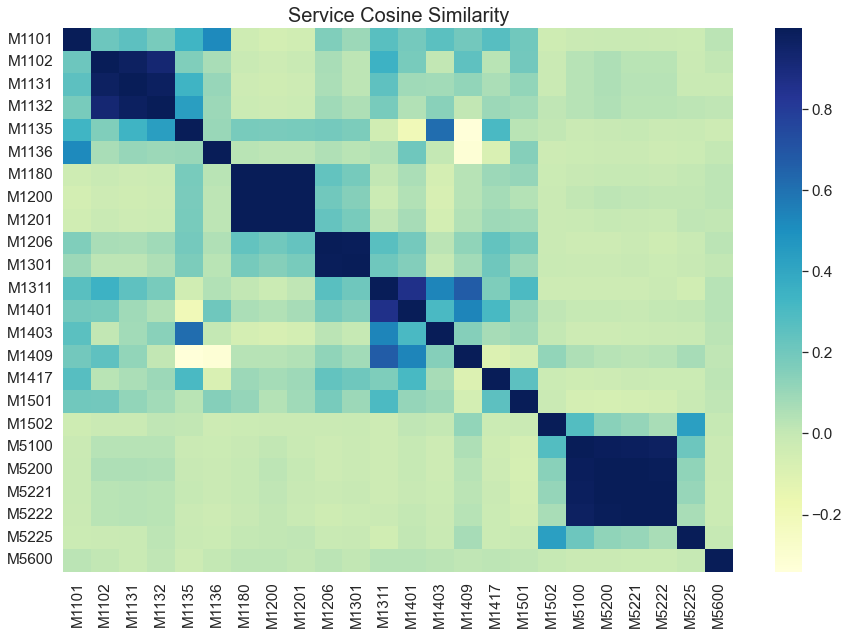

In [186]:
fig, ax = plt.subplots(figsize=(15,10)) 

# different colormap
sns.heatmap(servCosSim_data, cmap='YlGnBu') # 
plt.title('Service Cosine Similarity', fontsize=20)
plt.show()


In [173]:
servCosSim_data['M1101'].sort_values(ascending=False)

M1101    1.000000
M1136    0.522681
M1135    0.334005
M1417    0.268685
M1311    0.266316
M1403    0.256973
M1131    0.252313
M1102    0.213659
M1501    0.203148
M1409    0.196594
M1401    0.189971
M1132    0.178162
M1206    0.161903
M1301    0.096126
M5600    0.020744
M5200   -0.012984
M5221   -0.013102
M5222   -0.019182
M5100   -0.020271
M5225   -0.024083
M1502   -0.034919
M1180   -0.036592
M1201   -0.043310
M1200   -0.055787
Name: M1101, dtype: float32

In [174]:
servCosSim_data['M1102'].sort_values(ascending=False)

M1102    1.000000
M1131    0.973699
M1132    0.921798
M1311    0.349595
M1409    0.250677
M1101    0.213659
M1501    0.195727
M1401    0.181555
M1135    0.160489
M1206    0.066417
M1136    0.065737
M5200    0.052620
M5100    0.032717
M1417    0.030175
M5222    0.030145
M5221    0.029146
M1301    0.016069
M1403    0.007505
M5600    0.005689
M1180   -0.012593
M1201   -0.013413
M5225   -0.020205
M1502   -0.020221
M1200   -0.028459
Name: M1102, dtype: float32

In [187]:
servCosSim_data['M5100'].sort_values(ascending=False)

M5100    1.000000
M5200    0.987147
M5221    0.982513
M5222    0.968681
M1502    0.278695
M5225    0.209587
M1409    0.055443
M1132    0.034529
M1102    0.032717
M1131    0.032294
M1200    0.008246
M1401   -0.001625
M1180   -0.009190
M1201   -0.012933
M1301   -0.017130
M1135   -0.019318
M5600   -0.019637
M1101   -0.020271
M1136   -0.024521
M1403   -0.028218
M1206   -0.029008
M1311   -0.030812
M1417   -0.035083
M1501   -0.059130
Name: M5100, dtype: float32

In [188]:
servCosSim_data['M5221'].sort_values(ascending=False)

M5221    1.000000
M5200    0.997618
M5222    0.995858
M5100    0.982513
M1502    0.110557
M5225    0.109284
M1131    0.032388
M1132    0.030285
M1102    0.029146
M1409    0.021555
M1200    0.015128
M1180   -0.001266
M1135   -0.003463
M1301   -0.006064
M1201   -0.006100
M1401   -0.008237
M1101   -0.013102
M1136   -0.016853
M1206   -0.017263
M1417   -0.020559
M1403   -0.021918
M5600   -0.026092
M1311   -0.030746
M1501   -0.053445
Name: M5221, dtype: float32

In [141]:
final_data_normalized.columns

Index(['ID', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61'],
      dtype='object')

In [ ]:
# np.save('./PatCosSim', PatCosSim)
# np.save('./FeatCosSim', FeatCosSim)

In [ ]:
# np.save('./PatAcrCosDist', PatAcrCosDist)
# np.save('./FeatAcrCosDist', FeatAcrCosDist)

# PCA

In [145]:
# https://www.kaggle.com/code/samuelcortinhas/intro-to-pca-t-sne-umap?scriptVersionId=91145128
# Core
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px

# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# UMAP
import umap
import umap.plot

In [146]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(servCosSim)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(24, 2)


,PC1,PC2
0,-0.502760,-0.475190
1,-0.447852,-1.027111
2,-0.438428,-1.039421
3,-0.424124,-0.974634
4,-0.454948,-0.048925


Text(0, 0.5, 'PC2')

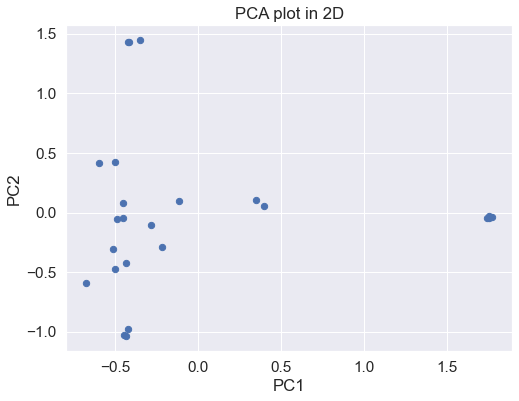

In [147]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# KMeans Clustering

In [148]:
# KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=15, max_iter=500, random_state=42)

# Train and make predictions
clusters = kmeans.fit_predict(servCosSim)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

Text(0, 0.5, 'PC2')

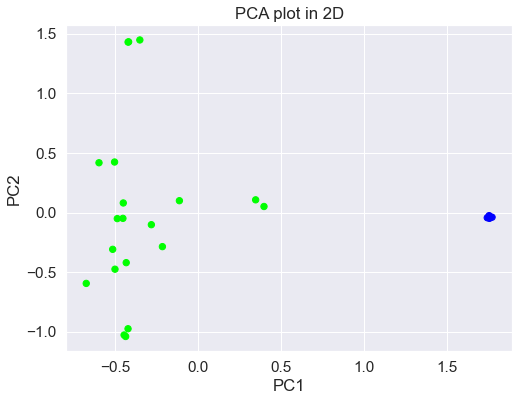

In [149]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
# plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
# Figure size
plt.figure(figsize=(15,8))
sns.scatterplot(data=principal_df, x="PC1", y="PC2", c=clusters, cmap="PiYG", s=40)

In [ ]:
# KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_score_list = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)

    # Train and make predictions
    clusters = kmeans.fit_predict(PatVec)
    
    print(i)
    silhouette_score_list.append(silhouette_score(PatVec, clusters, random_state=42))

In [ ]:
print(silhouette_score_list)

In [ ]:
# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(PatCosSim)

# 3D scatterplot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(PatCosSim)), opacity = 1,
    title='PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

# UMAP 사용

In [ ]:
# https://www.kaggle.com/code/samuelcortinhas/intro-to-pca-t-sne-umap?scriptVersionId=91145128
import umap

um = umap.UMAP()
X_fit = um.fit(PatCosSim)           # we'll use X_fit later
X_umap = um.transform(PatCosSim)

In [ ]:
# Convert to data frame
umap_df = pd.DataFrame(data = mapper, columns = ['umap comp. 1', 'umap comp. 2'])

In [ ]:
# Shape and preview
print(umap_df.shape)
umap_df.head()

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Centroids
centroids_umap = um.transform(centroids)
plt.scatter(x=centroids_umap[:,0], y=centroids_umap[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

In [ ]:
# UMAP
um = umap.UMAP(n_components=3)
components_umap = um.fit_transform(PatCosSim)

# 3D scatterplot
fig = px.scatter_3d(
    components_umap, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(PatCosSim)), opacity = 1,
    title='UMAP plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=800, height=500
)
fig.show()

# t-SNE

In [ ]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(PatCosSim)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

In [ ]:
# t-SNE
tsne = TSNE(n_components=3)
components_tsne = tsne.fit_transform(PatCosSim)

# 3D scatterplot
fig = px.scatter_3d(
    components_tsne, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(PatCosSim)), opacity = 1,
    title='t-SNE plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=800, height=500
)
fig.show()

In [ ]:
tf.reduce_max(PatAcrCosDist)

In [ ]:
tf.reduce_min(PatAcrCosDist)

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
# clustering = SpectralClustering(n_clusters=3,
#                 affinity ='precomputed',
#                 random_state=0).fit(PatCosSim)

# Keras Guide Collaborative Filtering for Movie Rec
https://www.kaggle.com/code/nicapotato/keras-guide-collaborative-filtering-for-movie-rec/notebook

In [ ]:
df = melted_data.copy()

In [ ]:
df = df.astype(np.float32)

In [ ]:
"""
Title: Collaborative Filtering for Movie Recommendations
Author: [Siddhartha Banerjee](https://twitter.com/sidd2006)
Date created: 2020/05/24
Last modified: 2020/05/24
Description: Recommending movies using a model trained on Movielens dataset.
"""
"""
## Introduction
This example demonstrates
[Collaborative filtering](https://en.wikipedia.org/wiki/Collaborative_filtering)
using the [Movielens dataset](https://www.kaggle.com/c/movielens-100k)
to recommend movies to users.
The MovieLens ratings dataset lists the ratings given by a set of users to a set of movies.
Our goal is to be able to predict ratings for movies a user has not yet watched.
The movies with the highest predicted ratings can then be recommended to the user.
The steps in the model are as follows:
1. Map user ID to a "user vector" via an embedding matrix
2. Map movie ID to a "movie vector" via an embedding matrix
3. Compute the dot product between the user vector and movie vector, to obtain
the a match score between the user and the movie (predicted rating).
4. Train the embeddings via gradient descent using all known user-movie pairs.
**References:**
- [Collaborative Filtering](https://dl.acm.org/doi/pdf/10.1145/371920.372071)
- [Neural Collaborative Filtering](https://dl.acm.org/doi/pdf/10.1145/3038912.3052569)
"""

import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
"""
First, need to perform some preprocessing to encode users and movies as integer indices.
"""
user_ids = df["ID"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["variable"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["ID"].map(user2user_encoded)
df["movie"] = df["variable"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["value"] = df["value"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["value"])
max_rating = max(df["value"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

In [ ]:
"""
## Prepare training and validation data
"""
df = df.sample(frac=1, random_state=42)
x = df[["ID", "variable"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["value"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
from tensorflow import keras
"""
## Create the model
We embed both users and movies in to 50-dimensional vectors.
The model computes a match score between user and movie embeddings via a dot product,
and adds a per-movie and per-user bias. The match score is scaled to the `[0, 1]`
interval via a sigmoid (since our ratings are normalized to this range).
"""
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)

In [ ]:
"""
## Train the model based on the data split
"""
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

"""
## Plot training and validation loss
"""
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
df

In [ ]:
# movie_df = pd.read_csv(movielens_dir / "movies.csv")


# Let us get a user and see the top recommendations.
user_id = df.ID.sample(1).iloc[0]
movies_watched_by_user = df[df.ID == user_id]
movies_not_watched = df[
    ~df["ID"].isin(movies_watched_by_user.ID.values)
]["ID"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="value", ascending=False)
    .head(5)
    .ID.values
)
movie_df_rows = df[df["ID"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = df[df["ID"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

In [ ]:
df[df["ID"].isin(top_movies_user)]

In [ ]:
df[df.ID == df.ID]

In [ ]:
user2user_encoded